In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org = pd.read_csv("all.csv", encoding='ISO-8859-1', low_memory=False)

In [3]:
org['Full'] = org['Address']+", "+org['County']
org['Date'] = pd.to_datetime(org['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y')
org['Full Market Price'] = org['Not Full Market Price'].replace({'Yes':0, 'No':1})
org['VAT exclusive'] = org['VAT Exclusive'].replace({'Yes':1, 'No':0})

In [4]:
org['Price'] = (org.iloc[:,4]
                .str.replace(',', '')
                .str.slice(1)
                .astype('float32'))

In [5]:
#remove all the unnecessary columns
org = (org
   .drop('Price ()', axis=1)
   .drop('Eircode', axis=1)
   .drop('Property Size Description', axis=1)
   .drop('Not Full Market Price' ,axis=1)
   .drop('VAT Exclusive',axis=1)
   .drop('Date of Sale (dd/mm/yyyy)',axis=1)
   .drop('Description of Property',axis=1)

)

In [6]:
org.head()

,Address,County,Full,Date,Full Market Price,VAT exclusive,Price
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,"5 Braemor Drive, Churchtown, Co.Dublin, Dublin",2010-01-01,1,0,343000.0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,"134 Ashewood Walk, Summerhill Lane, Portlaoise...",2010-01-03,1,1,185000.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,"1 Meadow Avenue, Dundrum, Dublin 14, Dublin",2010-01-04,1,0,438500.0
3,"1 The Haven, Mornington",Meath,"1 The Haven, Mornington, Meath",2010-01-04,1,0,400000.0
4,"11 Melville Heights, Kilkenny",Kilkenny,"11 Melville Heights, Kilkenny, Kilkenny",2010-01-04,1,0,160000.0


In [7]:
org.tail()

,Address,County,Full,Date,Full Market Price,VAT exclusive,Price
611146,"MAGHERMORE, GLENADE, COUNTY LEITRIM",Leitrim,"MAGHERMORE, GLENADE, COUNTY LEITRIM, Leitrim",2023-07-28,1,0,163750.0
611147,"SEAVEAGH, NEAR GLASSLOUGH, CO MONAGHAN",Monaghan,"SEAVEAGH, NEAR GLASSLOUGH, CO MONAGHAN, Monaghan",2023-07-28,1,0,175000.0
611148,"THE BUNGALOW, RING, CLONAKILTY",Cork,"THE BUNGALOW, RING, CLONAKILTY, Cork",2023-07-28,1,0,449000.0
611149,"THE COTTAGE, BLACKSTONE BRIDGE, LOWER KILEENS",Cork,"THE COTTAGE, BLACKSTONE BRIDGE, LOWER KILEENS,...",2023-07-28,1,0,275000.0
611150,"THE DORMER KILBERRY, CASTLETOWN, NAVAN",Meath,"THE DORMER KILBERRY, CASTLETOWN, NAVAN, Meath",2023-07-28,1,0,550000.0


In [9]:
dub = org[org['County'] == 'Dublin']
dub['Date'] = pd.to_datetime(dub['Date'])

In [26]:
dubyearmean = dub.groupby(pd.Grouper(key='Date', freq='Y'))['Price'].mean()

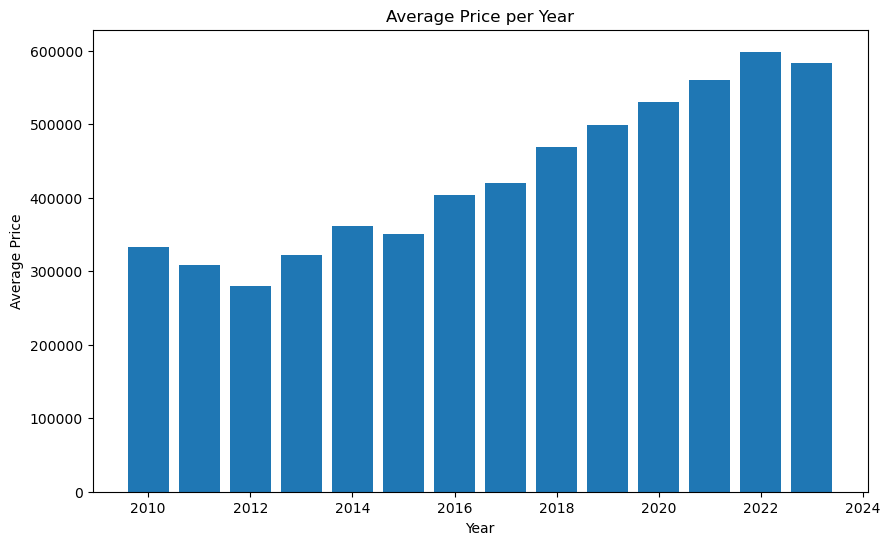

In [28]:
# a bar chart
plt.figure(figsize=(10, 6))
plt.bar(dubyearmean.index.year, dubyearmean.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price per Year')

plt.show()